In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import networkx as nx
import time
from node2vec import Node2Vec
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

## Load data

In [2]:
nodes = pd.read_csv('data/cora.content', sep='\t', header=None)
nodes = nodes.rename(columns={0:'id', 1434:'class'})
X = nodes[['id']]
X = X.sort_values(by=['id'])
X = np.array(X[['id']])
X

array([[     35],
       [     40],
       [    114],
       ...,
       [1154524],
       [1154525],
       [1155073]])

In [3]:
y = nodes[['id','class']]
y = y.sort_values(by=['id'])
y = np.ravel(np.array(y[['class']]))
y

array(['Genetic_Algorithms', 'Genetic_Algorithms',
       'Reinforcement_Learning', ..., 'Rule_Learning', 'Rule_Learning',
       'Rule_Learning'], dtype=object)

In [4]:
edges = pd.read_csv('data/cora.cites', sep='\t', header=None)
edges.columns=['id1','id2']
edges

,id1,id2
0,35,1033
1,35,103482
2,35,103515
3,35,1050679
4,35,1103960
...,...,...
5424,853116,19621
5425,853116,853155
5426,853118,1140289
5427,853155,853118


## Generate graph

In [5]:
#networkx graph
g = nx.Graph()
g.graph['name'] = 'cora'
g.add_nodes_from(nodes['id'].values)
g.add_edges_from(edges.values)

nx.write_gpickle(g, 'data/cora.gml')
print(g)

Graph named 'cora' with 2708 nodes and 5278 edges


In [6]:
# network degree
total_degree = 0
for node in g.nodes():
    total_degree += g.degree(node)
    
avg_degree = total_degree/g.number_of_nodes()
avg_degree

# use k=4

3.8980797636632203

## Run node2vec with default settings to get embeddings

In [7]:
node2vec = Node2Vec(g, seed=0)

# Generate embeddings
model = node2vec.fit(window=10, min_count=1, batch_words=4)
model.wv.save_word2vec_format('embedding/embedding_init.txt')

# Read embeddings
emb_df = pd.read_csv('embedding/embedding_init.txt', sep=' ', skiprows=[0], header=None)
emb_df = emb_df.sort_values(by=[0])
emb_df = emb_df.drop(emb_df.columns[0], axis=1)
emb_df

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|████████████████| 10/10 [00:07<00:00,  1.28it/s]


,1,2,3,4,5,6,7,8,9,10,...,119,120,121,122,123,124,125,126,127,128
0,0.024055,0.077034,-0.058195,0.168847,-0.341042,-0.214147,0.417767,0.625977,-0.280996,-0.102391,...,0.017681,-0.013077,0.391348,-0.180267,0.786786,-0.049900,0.045178,0.352553,0.006776,0.165722
1193,-0.165536,-0.094804,-0.025823,-0.350613,0.077264,-0.264253,0.223034,0.115054,0.181867,-0.014536,...,-0.108528,0.517046,0.394003,-0.464339,0.922098,0.074979,-0.165107,0.270172,-0.394128,-0.562878
6,0.344501,-0.440875,0.045956,-0.313090,0.326382,-0.147178,0.463841,0.291187,-0.219282,0.184543,...,0.209984,-0.060198,0.089960,0.117316,0.374668,-0.178705,-0.095150,0.186651,0.743144,-0.079844
44,0.120736,0.000865,-0.265791,-0.046966,0.032744,0.085427,0.163420,0.107061,-0.299424,0.215604,...,-0.160350,-0.301376,0.700644,-0.135891,0.329379,-0.035468,0.123842,0.098557,0.446801,-0.305517
231,0.402695,-0.130377,-0.017250,-0.164055,0.130702,0.159816,0.272824,0.356330,0.130340,0.502823,...,0.086221,0.215433,0.101051,-0.003670,0.258163,0.145098,0.119894,0.508259,0.526998,-0.087674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653,0.113710,0.077899,0.375364,-0.427762,-0.027568,-0.278118,0.067321,0.314763,-0.265302,0.493658,...,0.321358,-0.075847,0.069607,0.188991,0.233403,0.320667,-0.105589,0.675484,0.583699,-0.105776
2630,0.241529,0.134525,0.226960,-0.804236,-0.107837,-0.038342,0.332217,0.563926,-0.338702,-0.146623,...,0.644778,0.036874,-0.181222,-0.897460,0.544132,-0.011032,-1.010047,0.153897,-0.133675,-0.202045
1393,0.426767,-0.377798,-0.560503,-1.256571,-0.052457,0.327006,-0.188007,0.320513,0.794590,0.294410,...,0.605075,-0.504393,0.057065,-0.999138,0.251195,0.593607,-0.308273,0.525212,0.571010,0.691113
1107,0.245987,-0.368888,-0.140418,-0.631000,-0.175155,0.225796,0.077935,0.508195,0.335814,0.599936,...,0.255034,0.052670,0.066840,-0.182370,0.832294,0.227124,-0.444042,1.276122,0.206663,0.088754


## Split data

In [8]:
# Train Test Split
seed = np.random.randint(0, len(emb_df), 1)
X_train, X_test, y_train, y_test = train_test_split(emb_df, y, test_size=0.20, random_state=seed[0])
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

## Classification using embeddings

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Define classifiers
lr = LogisticRegression(multi_class='auto',max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=4)
svm = svm.SVC(kernel='linear')
nb = GaussianNB()
dt = DecisionTreeClassifier()

In [10]:
# Run classifiers on embeddings
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
nb.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
# Predict for test
lr_pred = lr.predict(X_test)
knn_pred = knn.predict(X_test)
svm_pred = svm.predict(X_test)
nb_pred = nb.predict(X_test)
dt_pred = dt.predict(X_test)

In [12]:
# Accuracy and f1 scores
lr_acc = accuracy_score(y_test,lr_pred)
knn_acc = accuracy_score(y_test,knn_pred)
svm_acc = accuracy_score(y_test,svm_pred)
nb_acc = accuracy_score(y_test,nb_pred)
dt_acc = accuracy_score(y_test,dt_pred)
acc = [lr_acc,knn_acc,svm_acc,nb_acc,dt_acc]

lr_f1_micro = f1_score(y_test,lr_pred, average='micro')
knn_f1_micro = f1_score(y_test,knn_pred, average='micro')
svm_f1_micro = f1_score(y_test,svm_pred, average='micro')
nb_f1_micro = f1_score(y_test,nb_pred, average='micro')
dt_f1_micro = f1_score(y_test,dt_pred, average='micro')
micro = [lr_f1_micro,knn_f1_micro,svm_f1_micro,nb_f1_micro,dt_f1_micro]

lr_f1_macro = f1_score(y_test,lr_pred, average='macro')
knn_f1_macro = f1_score(y_test,knn_pred, average='macro')
svm_f1_macro = f1_score(y_test,svm_pred, average='macro')
nb_f1_macro = f1_score(y_test,nb_pred, average='macro')
dt_f1_macro = f1_score(y_test,dt_pred, average='macro')
macro = [lr_f1_macro,knn_f1_macro,svm_f1_macro,nb_f1_macro,dt_f1_macro]

In [13]:
scores = pd.DataFrame(data=['KNN','LR','SVM','NB','DT'], columns=['classifier'])
scores['accuracy'] = acc
scores['f1_micro'] = micro
scores['f1_macro'] = macro
scores

,classifier,accuracy,f1_micro,f1_macro
0,KNN,0.800738,0.800738,0.795095
1,LR,0.804428,0.804428,0.792206
2,SVM,0.806273,0.806273,0.799754
3,NB,0.743542,0.743542,0.744498
4,DT,0.647601,0.647601,0.619054


In [14]:
import dataframe_image as dfi
dfi.export(scores,'images/init_classifier_scores.png')

[1205/195001.176664:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/76/p5884tp57fj2wy8qn17tpc6c0000gn/T/: Operation not permitted (1)
[1205/195001.179021:ERROR:file_io.cc(94)] ReadExactly: expected 8, observed 0
[1205/195001.179930:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/76/p5884tp57fj2wy8qn17tpc6c0000gn/T/: Operation not permitted (1)
[1205/195002.186322:INFO:headless_shell.cc(653)] Written to file /var/folders/76/p5884tp57fj2wy8qn17tpc6c0000gn/T/tmpec8ynftx/temp.png.


## TSNE plot with initial embeddings

/Users/mamatashrestha/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/mamatashrestha/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


t-SNE done! Time elapsed: 5.971826791763306 seconds


/var/folders/76/p5884tp57fj2wy8qn17tpc6c0000gn/T/ipykernel_7598/2947478454.py:35: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1],  c=palette[colors.astype(np.int)], cmap=plt.cm.get_cmap('Paired'))


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-25.119549, 40.640274, 'Case_Based'),
  Text(-58.10378, -5.2547655, 'Genetic_Algorithms'),
  Text(3.849964, -28.30635, 'Neural_Networks'),
  Text(44.313652, -10.2837925, 'Probabilistic_Methods'),
  Text(-20.16911, 3.2534142, 'Reinforcement_Learning'),
  Text(7.090315, 42.677887, 'Rule_Learning'),
  Text(16.41138, 33.579437, 'Theory')])

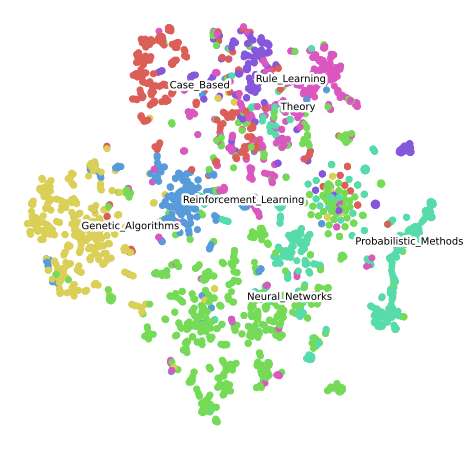

In [15]:
plot.draw_plot(emb_df, y, 'images/embedding_init.png')